# Homework 3: Random Variables and Their Distributions
***

**Name**: Javier Ramirez

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
import math
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [36]:
# call this function to return a new board (3x3 matrix of zeros)
def newBoard():
    board = np.zeros([9])
    return board

In [37]:
# get an empty space on the board
def get_empty_board_position(used):
    # Picks spot on board not used
    picks = np.random.choice(range(0,9))
    # check to make sure that picks IS NOT already in used
    if picks in used:
        return get_empty_board_position(used)
    else:
        return picks

In [38]:
get_empty_board_position([0,1,3,4,6,7,8])

5

In [39]:
def Track():
     # to start, nothing is used
    used = []
    # get a move for the boy and call it "boymove"
    boymove = get_empty_board_position(used)
    # now it's used -> so add it to used
    used.append(boymove)
    # get a move for the woman and call it "women"
    womenmove = get_empty_board_position(used)
    # now it's used -> so add it to used
    used.append(womenmove)


In [40]:
def winner(board):
    if ((board[0] == board[1] == board[2] != 0)):
        return True
    elif ((board[3] == board[4] == board[5] != 0)):
        return True
    elif ((board[6] == board[7] == board[8] != 0)):
        return True
    elif ((board[0] == board[3] == board[6] != 0)):
        return True
    elif ((board[1] == board[4] == board[7] != 0)):
        return True
    elif ((board[2] == board[5] == board[8] != 0)):
        return True
    elif ((board[0] == board[4] == board[8] != 0)):
        return True
    elif ((board[2] == board[4] == board[6] != 0)):
        return True
    else:
        return False

In [43]:
def play_ttt():
    # start with an empty board
    used = []
    # after each play, check to see if there is a winner
    board = newBoard()
    # for 9 turns, alternate who plays, with the boy playing first.
    for turn in range(0,9):
        #print("Turn:",turn)
        if(turn % 2 == 0):
            boysmove = get_empty_board_position(used)
            used.append(boysmove)
            #print("boys move", boysmove)
            board[boysmove] = 1
            if winner(board):
                return 1
          #  else:
           #     pass
        else: 
            womensmove = get_empty_board_position(used)
            used.append(womensmove)
            #print("womens move", womensmove)
            board[womensmove] = 2
            if winner(board):
                 return 0
        #    else:
         #       pass
    return 0

In [47]:
play_ttt()

1

In [50]:
def tic_tac_toe(trials):
    prob = np.zeros(trials)
    for i in range(trials):
        prob[i] = play_ttt() 
    return np.sum(prob)/(trials)
print("probability boy wins",tic_tac_toe(1000))

probability boy wins 0.58


#### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

$\int_{1}^{10} \frac{10}{cx^2}dx \rightarrow [\frac{-10}{cx}]^{10}_1 \rightarrow \frac{-10}{10c} + \frac{10}{1c} = 1 \rightarrow \frac{-10}{10c} + \frac{100}{10c}=1 \rightarrow \frac{90}{10c}=1 \rightarrow 9 = c$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$$
\int_{1}^{y} \frac{10}{9y^2}dy \rightarrow [\frac{-10}{9y}]^{y}_1 \rightarrow \frac{-10}{9y}+\frac{10}{9}
$$

$$
f(y) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cy^2} & 1 \leq y \leq 10 \\
0 & \textrm{1>y} \\
1 & \textrm{y>10}
\end{array}
\right.
$$

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

$1-[\frac{-10}{9(8)}+\frac{10}{9}] \rightarrow 1 -[\frac{-10}{72}+\frac{80}{72}] \rightarrow 1-\frac{70}{72} \rightarrow \frac{2}{72}$

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

$$
\frac{9}{10}-\frac{-10}{9y}+\frac{10}{9} = 0
$$
$$
-\frac{19}{90}+\frac{10}{9y}
$$

$$
\frac{10}{9y}=\frac{19}{90}
$$

$$
10(90) = 19(9y)
$$

$$
900=171y
$$

$$
5.26 = y
$$

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

$$
P(T_1,T_2,T_3,T_4) = P(T_1 \cap T_2 \cap T_3 \cap T_4)
$$

$$
\frac{2}{72}*\frac{2}{72}*\frac{2}{72}*\frac{2}{72} = 5.95*10^{-7}
$$

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [2]:
def pmf_natural(x):
    num = math.log10((x+1)/x)
    return num
uniform = [0] * 10
prob = [0] * 10
total = 0
for r in range(1,10):
    prob[r] = pmf_natural(r)
    uniform[r] = 0.1
    total = total + prob[r]
    print(r, prob[r])
print("Total =", total)

1 0.3010299956639812
2 0.17609125905568124
3 0.12493873660829992
4 0.09691001300805642
5 0.07918124604762482
6 0.06694678963061322
7 0.05799194697768673
8 0.05115252244738129
9 0.04575749056067514
Total = 1.0


**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

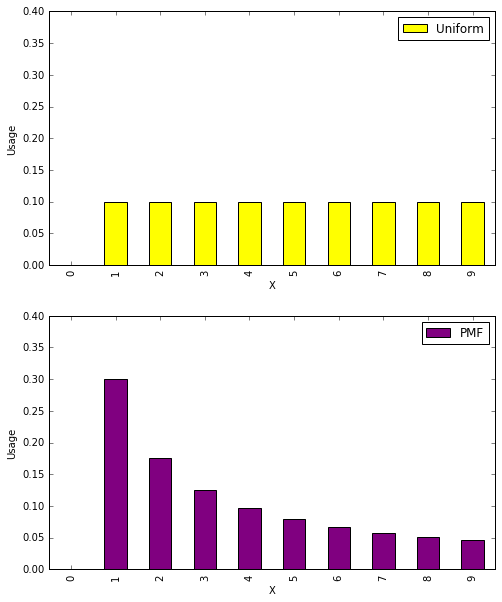

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
numbers = ('1','2','3','4','5','6','7','8','9')
x_pos = np.arange(len(numbers))
ax[0].set_ylim((0,2/5))
ax[1].set_ylim((0,2/5))
ax[0].set_xlabel("X", fontsize=10)
ax[0].set_ylabel("Usage", fontsize=10)
ax[1].set_xlabel("X", fontsize=10)
ax[1].set_ylabel("Usage", fontsize=10)
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
plt.xticks(x_pos, numbers)
data= {'Uniform': uniform}
dfUniform = pd.DataFrame(data, columns=['Uniform'])
data2={'PMF': prob}
dfProb = pd.DataFrame(data2, columns=['PMF'])
dfUniform.plot.bar(ax=ax[0],color="yellow",align ="center")
dfProb.plot.bar( ax=ax[1],color="purple", align="center")
plt.show()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [4]:
def cdf_natural(y):
    pmf = math.log10((y+1)/y)
    val = 0
    for r in range(1,y+1):
        val = val + (math.log10((r+1)/r))
    return val
    
print("Probability leading digit ia a number of at most 4 = {}".format(cdf_natural(4)))
print("Probability leading digit ia a number of at most 5 = {}".format(cdf_natural(5)))

Probability leading digit ia a number of at most 4 = 0.6989700043360189
Probability leading digit ia a number of at most 5 = 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157518 entries, 1 to 157518
Data columns (total 1 columns):
Tax Incomes    157518 non-null float64
dtypes: float64(1)
memory usage: 2.4 MB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88fe3bae10>], dtype=object)

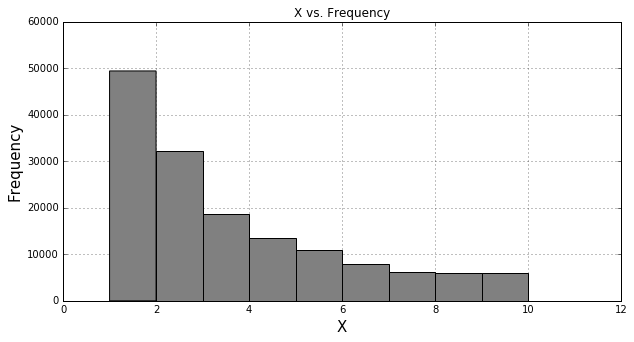

In [18]:
web_path = "https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk03/tax_data.txt"
local_path = 'tax_data.txt'
local_path = file_path
Tax = pd.read_csv(file_path, delim_whitespace = True)
print(Tax.info())
dfTax.head()
dfTClean = Tax.loc[Tax["Tax Incomes"] != 0]
TInventory = dfTClean["Tax Incomes"].tolist()
calc = [(x / (pow(10,math.floor(math.log10(x))))) for x in TInventory]
dfTdata = pd.DataFrame(calc)
dfTdata.columns = ["X vs. Frequency"]
my_bins = range(1,12,1)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("X vs. Frequency", fontsize=20)
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_ylim([0,60000])
ax.set_xlim([0,12])
ax.set_axisbelow(True)
dfTdata.hist(ax=ax,bins=my_bins, facecolor="gray")

The frequency from this graph and the graph of the probability of mass function are identical meaning that the taxable income for individuals in 1978 is not fraudulent.

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 


$\mu$ is the expected rate that the boats cross the bridge per day.

The parameters of the distribution is f(k) = $\frac{20^ke^{-20}}{k!}$ 

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

k is the amount of crossing that will occure.
The probability that 25 boats cross under the bridge on a paticular day is
$$
f(25) = \frac{20^{25}e^{-20}}{25!}
$$

$$
= \frac{(3.35*10^{32})(2.0*10^{-9})}{1.55*10^{25}} 
$$

$$
\approx 0.0432
$$

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

$$
\sum_{k=0}^{15} \frac{20^k(e^{-20})}{k!} 
$$

$$
\frac{6.1*10^{11}}{8019*e^{20}}
$$

$$
0.157
$$

**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

$$
F(t) = 1-e^{-\mu*t}
$$

$$
F(t_2) - F(t_1) = (1-e^{-\mu*t_2})-(1-e^{-\mu*t_1})
$$

20=per day $\frac{20}{24}=\frac{5}{6}$

$$
= (1-e^{\frac{-5}{6}*2})-(1-e^{\frac{-5}{6}*1})
$$

$$
= 0.81 - 0.56
$$

$$
=0.25
$$

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [20]:
def boat_count(lam):
    time = 0
    boat = 0
    sim = 1/lam
    while time < 1:
        time += np.random.exponential(sim)
        if time < 1:
            boat += 1
    return boat
boat_count(20)

21

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [21]:
def boat_count_sim(lam, num_days=int(1e3)):
    fewer = 0
    for i in range(num_days):
        count = boat_count(lam)
        if count <= 15:
            fewer += 1    
    return fewer/num_days
boat_count_sim(20,50000)

0.1571

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [22]:
def boat_time_sim(lam, num_boats=int(1e3)):
    lam = lam/24
    sim = 1/lam
    bet = 0
    for i in range(1,num_boats):
        time = np.random.exponential(sim)
        if time >=1 and time <=2:
            bet += 1
    return bet/num_boats
boat_time_sim(20, 50000)

0.2444

### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


$Px^k = \binom{n}{k} p^k$ x $(1 - p)^{n-k}$

$Px^k = \binom{7}{5} 0.55^{5}$ x $(1 - 0.55)^{7-5}$ is the probability the Boulder Beaters winning 5/7 matches played.

$Px^k = \frac{7!}{(7-5)!5!}$x$(0.55^5)$ x $(0.45^2)$x $0.55$

$Px^k = (21 $x$ 0.55^5) $x$ (0.45^2) $x$ 0.55$

$Px^k = (21 $x$ 0.55^6) $x$ (0.45^2)$ probability of winning 8 games

$Px^k = 11.77%$ percent chance of winning on the 8th match played.

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

$1st = Px^k = \binom{5}{5} 0.55^{5} * (1 - 0.55)^{5-5} * 0.55 \rightarrow 0.2768$ Probability to win on 6th match of 6 games.

$2nd = Px^k = \binom{6}{5} 0.55^{5} * (1 - 0.55)^{6-5} * 0.55 \rightarrow 0.0747$ Probability to win on 6th match of 7 games.

$3rd = Px^k = \binom{7}{5} 0.55^{5} * (1 - 0.55)^{7-5} * 0.55 \rightarrow 0.1177$ Probability to win on 6th match of 8 games.

$4th = Px^k = \binom{8}{5} 0.55^{5} * (1 - 0.55)^{8-5} * 0.55 \rightarrow 0.1413$ Probability to win on 6th match of 9 games.

$5th = Px^k = \binom{9}{5} 0.55^{5} * (1 - 0.55)^{9-5} * 0.55 \rightarrow 0.1430$ Probability to win on 6th match of 10 games.

$6th = Px^k = \binom{10}{5} 0.55^{5} * (1 - 0.55)^{10-5} * 0.55 \rightarrow 0.1287$ Probability to win on 6th match of 11 games.

$1st+2nd+3rd+4th+5th+6th = 0.6331$  which is $63.31$% that we win the 11 game series in any valid number of matches.

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

$1st = 1 $ x $ 0.70^6 $ x $ 0.30^0 = 0.1176$ Probability to win on 6th match of 6 games.

$2nd= 6 $ x $ 0.70^6 $ x $ 0.30^1 = 0.2118$ Probability to win on 6th match of 7 games.

$3rd = 21 $ x $ 0.70^6 $ x $ 0.30^2 = 0.2234$ Probability to win on 6th match of 8 games.

$4th = 56 $ x $ 0.70^6 $ x $ 0.30^3 = 0.1779$ Probability to win on 6th match of 9 games.

$5th = 126 $ x $ 0.70^6 $ x $ 0.30^4 = 0.1201$ Probability to win on 6th match of 10 games.

$6th = 252 $ x $ 0.70^6 $ x $ 0.30^5 = 0.0720$ Probability to win on 6th match of 11 games.

$1st+2nd+3rd+4th+5th+6th = 0.9218$ and which is 92.18% to win any of the 11 game series with Bludgers Bob's assistance.

If the team wins, the payout is $\$9400(0.9218) = \$8664.92$.

If the team loses, the payout is $\$0(1-0.9218) = \$0$.

esxpected pay is $win - lose = \$8644.92$.

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


Assumption is the series needs $k = \frac{N+1}{2}$ to win the series. Using the summation method to calculate all

$\sum_{n=k}^{N} \binom{n-1}{k-1} p^{k-1} * (1 - p)^{(n-1)-(k-1)} * p$

If $N=99$

$\sum_{n=50}^{99} \binom{n-1}{50-1} 0.70^{50-1} * (1 - 0.70)^{(n-1)-(50-1)} * 0.70 \rightarrow \sum_{n=50}^{99} \binom{n-1}{49} 0.70^{50} * (0.30)^{n-50} = 0.9999$

Thus, the probability of winning is 99.99% chance of winning with Bludger Bob's assistance.

If the team wins the payout is $\$9400(0.9999) = \$9399.06$

If the team loses the payout is $ \$0(1-0.9999) = \$0$

The expected pay is $wins - losses = $\$9399.85$

If $N=3$

$\sum_{n=2}^{3} \binom{n-1}{2-1} 0.70^{2-1} * (1 - 0.70)^{(n-1)-(2-1)} * 0.70 \rightarrow \sum_{n=2}^{3} \binom{n-1}{1} 0.70^{2} * (0.30)^{n-2} = 0.7840$

Thus, the probability of winning is 78.40% chance of winning with Bludger Bob's assistance.

If the team wins the payout is $\$9400(0.784) = \$7369.60$

If the team loses the payout is $\$0(1-0.784) = \$0$

The expected pay is $wins - losses$ = \$7369.60

Taking the short series has an Expected Payout of \$7370. The longer series has an Expected Payout of \$9400.

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

The optimal series would have a length of 15


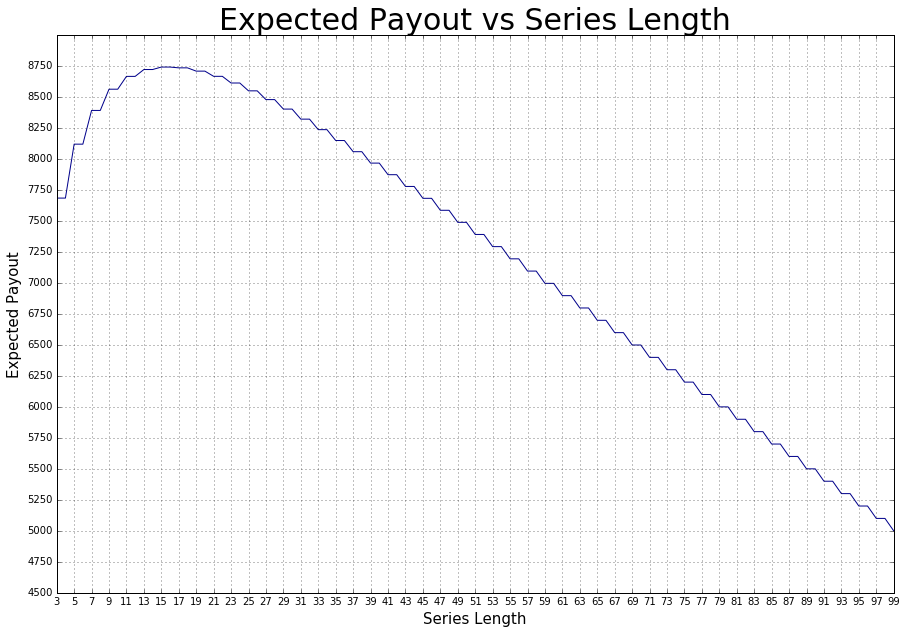

In [66]:
def optimal_series(p):
    N = 3
    exmaxPay = 0
    exmaxPayLoc = 0
    adding = [0] * 101
    while N <= 99:
        summing= 0
        k = (N+1)/2 
        n_k = k
        while n_k <= N:
            calc = (math.factorial(n_k-1) / (math.factorial(n_k-k)*math.factorial(k-1))) * p**(k) * (1-p)**(n_k-k)
            summing = summing + calc
            n_k = n_k + 1
        adding[N] = summing * (10000 - 100*k)
        adding[N+1] = adding[N] 
        if adding[N] > exmaxPay:
            exmaxPay = adding[N]
            exmaxPayLoc = N
        N = N + 2
    fig, axes = plt.subplots(figsize=(15,10))
    axes.set_title("Expected Payout vs Series Length", fontsize=30)
    axes.set_xlabel("Series Length", fontsize=15)
    axes.set_ylabel("Expected Payout", fontsize=15)
    axes.set_xlim(3,99)
    axes.set_ylim(4500,9000)
    plt.grid(True)
    plt.xticks(np.arange(3, 100, 2))
    plt.yticks(np.arange(4500,9000,250))
    plt.plot(adding, color="darkblue")
    return exmaxPayLoc

print("The optimal series would have a length of",optimal_series(0.70))

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
